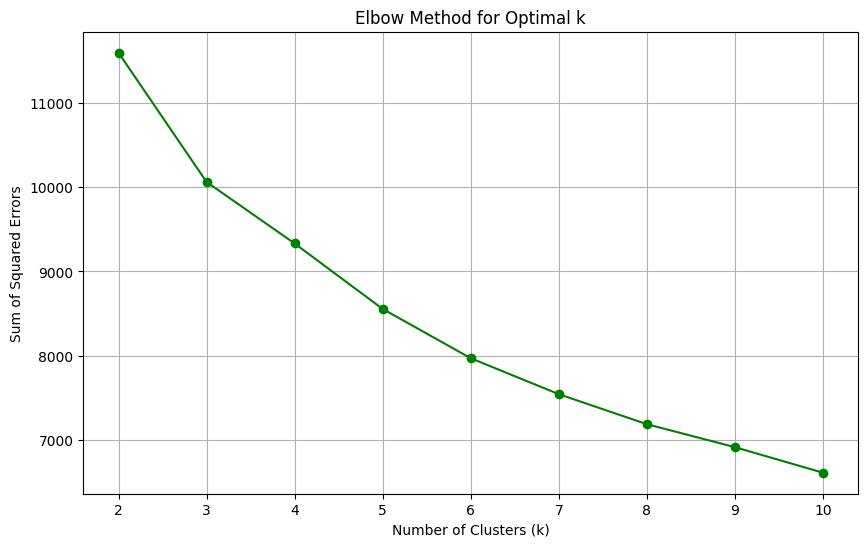

k=2: Sum of Squared Errors = 11595.46
k=3: Sum of Squared Errors = 10061.80
k=4: Sum of Squared Errors = 9331.97
k=5: Sum of Squared Errors = 8554.86
k=6: Sum of Squared Errors = 7970.41
k=7: Sum of Squared Errors = 7543.74
k=8: Sum of Squared Errors = 7187.56
k=9: Sum of Squared Errors = 6914.99
k=10: Sum of Squared Errors = 6611.94


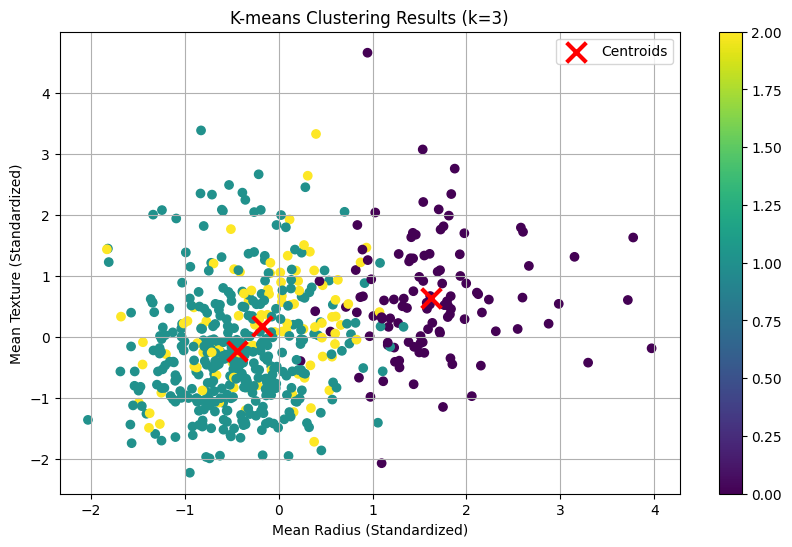

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# I got a warning about how it couldn't find the right number of cores in my computer, which doesn't really affect the program, so I surpress it.
warnings.filterwarnings('ignore')

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate sum of squared errors for different k values
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Print the sum of squared errors for each k
for k, inertia in zip(k_values, inertias):
    print(f'k={k}: Sum of Squared Errors = {inertia:.2f}')

# Fit the optimal model (from the elbow method graph, you see that we have the sharpest curve at k=3, so use 3)
optimal_k = 3
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
optimal_kmeans.fit(X_scaled)

# Now we can visualize the clusters with a scatter plot. We used scaled data so centroids are actually in the center and have balanced amounts of data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                     c=optimal_kmeans.labels_, 
                     cmap='viridis')
plt.scatter(optimal_kmeans.cluster_centers_[:, 0], 
           optimal_kmeans.cluster_centers_[:, 1], 
           marker='x', s=200, linewidths=3, 
           color='r', label='Centroids')
plt.title('K-means Clustering Results (k=3)')
plt.xlabel('Mean Radius (Standardized)')
plt.ylabel('Mean Texture (Standardized)')
plt.legend()
plt.colorbar(scatter)
plt.grid(True)
plt.show()